# DAV 5400 Final Project Proposal - Bike Sharing Service
#### Team members: Sun Hee Park, Manling Yang
## Introduction
Today, there are many ride-sharing companies that offer users to share car rides, or ride electric scooters or bikes. These companies are very popular, and Uber and Lyft are even called "unicorns," which are startup companies valued at over $1 billion. Lime or Birds, the electric scooter-sharing startup companies, are also popular in San Francisco, Chicago and even in Paris. However, bike sharing is the worthiest of notice to be analyzed now and even for the future. It is because people face practical and realistic problems when sharing and cars and electric scooters which do not exist when people share bikes.

For example, with car sharing, people have to get a driver's license. They also have to have car insurance and they have to pay extra costs for gas or tiny scratches that might be occur while driving. Regarding electric scooters, safety is considered to be an issue. In California, Electric Scooter Helmet Laws took effect in 2019. However, it is hard to bring a helmet to ride an electric scooter because people usually take a scooter when they go shorter distances than when they go with a car or a bike.
A bike can solve these problems. People do not have to have a car insurance or a driver's license. A bike is also safer than an electric scooter. __According to the Washington Post, two Los Angeles emergency departments,__ more people were injured while riding standing electric scooters than by riding bicycles or traveling on foot, according to the results of a groundbreaking study.

The Washington Post also showed that __the medical journal JAMA Network Open__ mentioned “The Riders share roads with fast-moving vehicular traffic but appear to underestimate hazards; we found that 94.3% of observed riders in our community were not wearing a helmet,” the study said of scooter users. “While riders of electric scooters in California are required to be at least 16 years old by state law and 18 years old by company rental agreements, we found that 10.8% of electric scooter injuries were in patients younger than 18 years." The study added, Although California law required helmet use while operating electric scooters during the entire study period, only 4.4% of injured scooter riders were documented to be wearing a helmet."

## Research Questions
Along with increasing number of Bike-Sharing users, companies want to analyze their customer's data. They want to conduct marketing based on users who are mostly using the service. We expected that the companies assume main factors as 'time', 'age', and 'gender' for analyzing their data.

In addition, we are also going to compare popularity in using this service in two cities - Chicago and New York. Thus, the questions that we take into account are:
- When (specific time) do people mostly use bike-sharing service?
- Which age range of is mostly using bike-sharing service?
- Which gender is the main users in both city?
- Which city is more popular to use the bike sharing services?

## Data to be Used
- The first data set('Chicago-Divvy-2016') is a SQL file.
- The second data ('NYC-BikeShare-2015-2017-combined') is a CSV from Kaggle.
- The attribuates meaning of the first data sources:
1. trip_id: the id of the trip
2. starttime: Time to star to use bike sharing services
3. stoptime: Time to stop to use bike sharing services
4. bikeid: the id of bike
5. tripduration: Time in sec
6. from_station_id: The id of the bike station for people star to use bike sahring services
7. from_station_name: The name of the bike station for people star to use bike sahring services
8. to_station_id: The id of the bike station for people stop to use bike sahring services
9. to_station_name: The name of the bike station for people stop to use bike sahring services
10. usertype:the type of bike sharing's user
11. gender: the gender of bike sharing's user
12. birthyear: the birth year of bike sharing's user

__the attribuate of the second data sources:__
1. Trip Duration: Time in sec
2. Start Time: Time to star to use bike sharing services
3. Stop Time： Time to stop to use bike sharing services
4. Start Station ID: The id of the bike station for people star to use bike sahring services
5. Start Station Name: The name of the bike station for people star to use bike sahring services
6. Start Station Latitude: The latitude of the bike station for people star to use bike sahring services
7. Start Station Longitude: The longtitude of the bike station for people star to use bike sahring services
8. End Station ID: The id of the bike station for people stop to use bike sahring services
9. End Station Name: The name of the bike station for people stop to use bike sahring services
10. End Station Latitude: The latitude of the bike station for people stop to use bike sahring services
11. End Station Longitude: The longtitude of the bike station for people stop to use bike sahring services
12. Bike ID: The id of the bike
13. User Type: the type of bike sharing's user
14. Birth Year: the birth year of bike sharing's user
15. Gender: the gender of bike sharing's user

## Approach
In this project, we are going to investigate the ride-sharing market first to understand our data well. Then we will start analyzing the data from Kaggle to understand what are considered to be influential factors for the bike-sharing service.

After the investigation, we are going to cleanse NYC-BikeShare data because it includes data from 2015 and 2017 as well. We are going to use only data from 2016 to compare with Chicago data from 2016. After that, we will also cleanse both data because these data should have the same column names or the same types of attributes to be compared. Then we will store our data as CSV format on github.

To analyze our data, we would apply a histogram and a box plot to figure out time and age range that the bike-sharing service is mostly used from. After than, we are going to use bar, histogram, scatter, line graphes to figure out the third and the last question.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy import stats
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## First dataset

In [15]:
pip install PyMySQL

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pymysql
pymysql.install_as_MySQLdb()

In [17]:
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1471gkdL!', db='ChiBike', charset='utf8')
db

In [19]:
curs = db.cursor()

In [20]:
sql= "select * from Chicago2016"

In [21]:
chibike=pd.read_sql(sql, db, parse_dates=['starttime','stoptime'])

In [22]:
chibike.head(5)

,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997


In [23]:
chibike.columns = ['start time', 'stop time', 'bikeid','trip duration(second)','start station id', 'start station name','end station id','end station name','user type','gender','birth_year']
chibike
chibike.head(10)

,start time,stop time,bikeid,trip duration(second),start station id,start station name,end station id,end station name,user type,gender,birth_year
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997
5,2016-03-31 21:44:00,2016-03-31 22:03:00,1381,1140,210,Ashland Ave & Division St,503,Drake Ave & Fullerton Ave,Subscriber,Male,1984
6,2016-03-31 21:26:00,2016-03-31 21:33:00,4460,418,67,Sheffield Ave & Fullerton Ave,324,Stockton Dr & Wrightwood Ave,Subscriber,Male,1974
7,2016-03-31 20:56:00,2016-03-31 21:13:00,2172,1022,23,Orleans St & Elm St (*),75,Canal St & Jackson Blvd,Subscriber,Male,1975
8,2016-03-31 20:53:00,2016-03-31 20:59:00,1664,367,239,Western Ave & Leland Ave,472,Lincoln Ave & Winona St,Subscriber,Male,1983
9,2016-03-31 20:42:00,2016-03-31 20:48:00,310,379,77,Clinton St & Madison St,56,Desplaines St & Kinzie St,Subscriber,Male,1986


In [24]:
chibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 11 columns):
start time               72131 non-null datetime64[ns]
stop time                72131 non-null datetime64[ns]
bikeid                   72131 non-null int64
trip duration(second)    72131 non-null int64
start station id         72131 non-null int64
start station name       72131 non-null object
end station id           72131 non-null int64
end station name         72131 non-null object
user type                72131 non-null object
gender                   72131 non-null object
birth_year               72131 non-null object
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 6.1+ MB


In [25]:
chibike["year"] = chibike["start time"].dt.year
chibike["month"] = chibike["start time"].dt.month
chibike["day"] = chibike["start time"].dt.day
chibike["hour"] = chibike["start time"].dt.hour
chibike["minute"] = chibike["start time"].dt.minute
chibike["second"] = chibike["start time"].dt.second

chibike["year"] = chibike["stop time"].dt.year
chibike["month"] = chibike["stop time"].dt.month
chibike["day"] = chibike["stop time"].dt.day
chibike["hour"] = chibike["stop time"].dt.hour
chibike["minute"] = chibike["stop time"].dt.minute
chibike["second"] = chibike["stop time"].dt.second

chibike.shape

(72131, 17)

In [26]:
chibike['day of week']=chibike['start time'].dt.dayofweek
print(chibike.shape)

(72131, 18)


In [27]:
chibike.head(5)

,start time,stop time,bikeid,trip duration(second),start station id,start station name,end station id,end station name,user type,gender,birth_year,year,month,day,hour,minute,second,day of week
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,2016,3,31,23,46,0,3
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974,2016,3,31,23,2,0,3
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992,2016,3,31,22,26,0,3
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979,2016,3,31,22,41,0,3
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997,2016,3,31,22,19,0,3


In [28]:
chibike.loc[chibike['day of week']==0, 'Mon-Sun']='Monday'
chibike.loc[chibike['day of week']==1, 'Mon-Sun']='Tuesday'
chibike.loc[chibike['day of week']==2, 'Mon-Sun']='Wednesday'
chibike.loc[chibike['day of week']==3, 'Mon-Sun']='Thursday'
chibike.loc[chibike['day of week']==4, 'Mon-Sun']='Friday'
chibike.loc[chibike['day of week']==5, 'Mon-Sun']='Saturday'
chibike.loc[chibike['day of week']==6, 'Mon-Sun']='Sunday'

chibike[['start time','stop time','day of week','Mon-Sun']].head(10)

,start time,stop time,day of week,Mon-Sun
0,2016-03-31 23:30:00,2016-03-31 23:46:00,3,Thursday
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3,Thursday
2,2016-03-31 22:24:00,2016-03-31 22:26:00,3,Thursday
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3,Thursday
4,2016-03-31 22:08:00,2016-03-31 22:19:00,3,Thursday
5,2016-03-31 21:44:00,2016-03-31 22:03:00,3,Thursday
6,2016-03-31 21:26:00,2016-03-31 21:33:00,3,Thursday
7,2016-03-31 20:56:00,2016-03-31 21:13:00,3,Thursday
8,2016-03-31 20:53:00,2016-03-31 20:59:00,3,Thursday
9,2016-03-31 20:42:00,2016-03-31 20:48:00,3,Thursday


[Text(0, 0.5, 'trip duration(second)'),
 Text(0.5, 1.0, 'Trip duration by hour')]

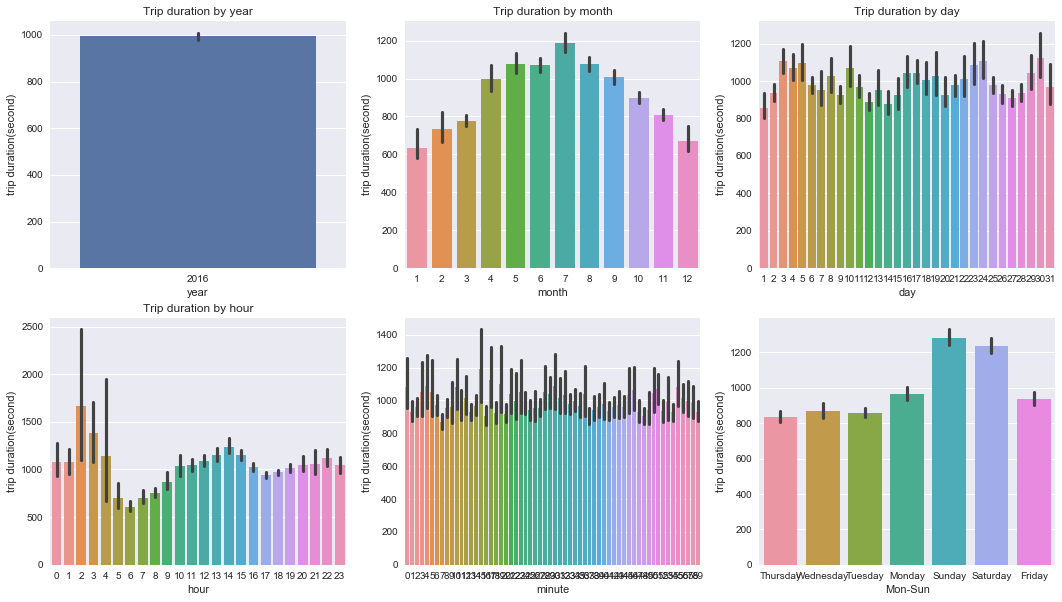

In [29]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=chibike, x = "year", y = "trip duration(second)", ax = ax1)
sns.barplot(data=chibike, x = "month", y = "trip duration(second)", ax = ax2)
sns.barplot(data=chibike, x = "day", y = "trip duration(second)", ax = ax3)
sns.barplot(data=chibike, x = "hour", y = "trip duration(second)", ax = ax4)
sns.barplot(data=chibike, x = "minute", y = "trip duration(second)", ax = ax5)
sns.barplot(data=chibike, x = "Mon-Sun", y = "trip duration(second)", ax = ax6)

ax1.set(ylabel = "trip duration(second)", title = "Trip duration by year")
ax2.set(ylabel = "trip duration(second)", title = "Trip duration by month")
ax3.set(ylabel = "trip duration(second)", title = "Trip duration by day")
ax4.set(ylabel = "trip duration(second)", title = "Trip duration by hour")

In [30]:
# Change names of value to be more meaningful with provided information
chibike.birth_year.replace({1960:'1960s',
                            1961:'1960s',
                            1962:'1960s',
                            1963:'1960s',
                            1964:'1960s',
                            1965:'1960s',
                            1966:'1960s',
                            1967:'1960s',
                            1968:'1960s',
                            1969:'1960s',
                            1970:'1970s',
                            1971:'1970s',
                            1972:'1970s',
                            1973:'1970s',
                            1974:'1970s',
                            1975:'1970s',
                            1976:'1970s',
                            1977:'1970s',
                            1978:'1970s',
                            1979:'1970s',
                            1980:'1980s',
                            1981:'1980s',
                            1982:'1980s',
                            1983:'1980s',
                            1984:'1980s',
                            1985:'1980s',
                            1986:'1980s',
                            1987:'1980s',
                            1988:'1980s',
                            1989:'1980s',
                            1990:'1990s',
                            1991:'1990s',
                            1992:'1990s',
                            1993:'1990s',
                            1994:'1990s',
                            1995:'1990s',
                            1996:'1990s',
                            1997:'1990s',
                            1998:'1990s',
                            1999:'1990s'},inplace=True)

[Text(0, 0.5, 'trip duration(second)'),
 Text(0.5, 1.0, 'Rental duration by birth year')]

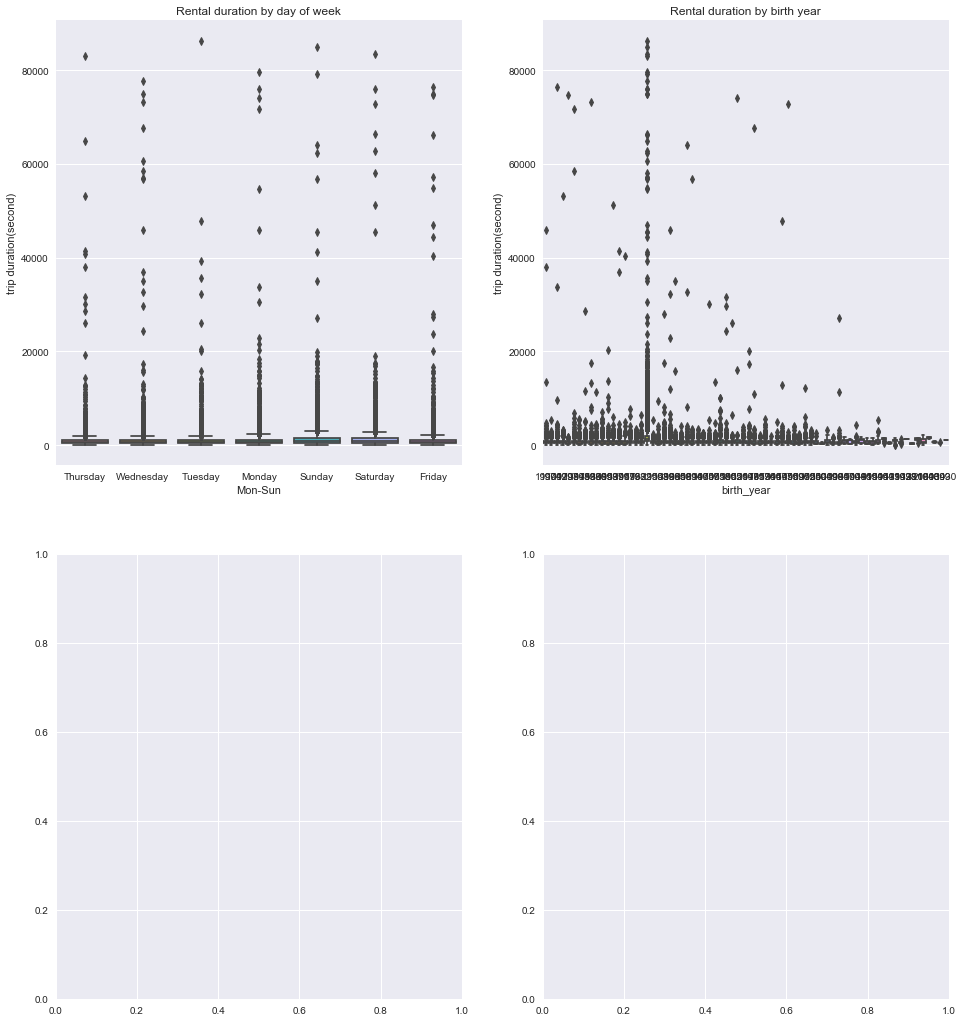

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 18))
sns.boxplot(data = chibike, y='trip duration(second)', x = 'Mon-Sun', orient = 'v', ax = axes[0][0])
sns.boxplot(data = chibike, y='trip duration(second)', x = 'birth_year', orient = 'v', ax = axes[0][1])

axes[0][0].set(ylabel = 'trip duration(second)', title = 'Rental duration by day of week')
axes[0][1].set(ylabel = 'trip duration(second)', title = 'Rental duration by birth year')

## 2nd Dataset

In [4]:
nybike=pd.read_csv('https://raw.githubusercontent.com/sunpark92/DAV-5400/master/NYC-CitiBike%202016.csv',parse_dates=['starttime','stoptime'])
print(nybike.shape)
nybike.columns = ['trip duration(second)', 'start time', 'stop time', 'start station id', 'start station name','end station id','end station name','bike id','user type','birth_year','gender']
nybike
nybike.head(10)

(276798, 11)


,trip duration(second),start time,stop time,start station id,start station name,end station id,end station name,bike id,user type,birth_year,gender
0,839,2016-01-01 00:09:00,2016-01-01 00:23:00,532,S 5 Pl & S 4 St,401,Allen St & Rivington St,17109,Customer,NaN,0
1,686,2016-01-01 00:21:00,2016-01-01 00:32:00,3143,5 Ave & E 78 St,3132,E 59 St & Madison Ave,23514,Subscriber,1960.0,1
2,315,2016-01-01 00:33:00,2016-01-01 00:38:00,3164,Columbus Ave & W 72 St,3178,Riverside Dr & W 78 St,14536,Subscriber,1971.0,1
3,739,2016-01-01 00:40:00,2016-01-01 00:53:00,223,W 13 St & 7 Ave,276,Duane St & Greenwich St,24062,Subscriber,1969.0,1
4,1253,2016-01-01 00:44:00,2016-01-01 01:05:00,484,W 44 St & 5 Ave,151,Cleveland Pl & Spring St,16380,Customer,NaN,0
5,525,2016-01-01 00:47:00,2016-01-01 00:55:00,474,5 Ave & E 29 St,470,W 20 St & 8 Ave,22823,Subscriber,1975.0,2
6,659,2016-01-01 00:55:00,2016-01-01 01:06:00,387,Centre St & Chambers St,377,6 Ave & Canal St,18602,Subscriber,1991.0,1
7,464,2016-01-01 01:25:00,2016-01-01 01:33:00,223,W 13 St & 7 Ave,236,St Marks Pl & 2 Ave,22873,Subscriber,1962.0,1
8,206,2016-01-01 01:37:00,2016-01-01 01:40:00,3071,Boerum St & Broadway,3072,Leonard St & Boerum St,23959,Subscriber,1999.0,2
9,425,2016-01-01 01:58:00,2016-01-01 02:05:00,379,W 31 St & 7 Ave,476,E 31 St & 3 Ave,23386,Customer,NaN,0


In [5]:
nybike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276798 entries, 0 to 276797
Data columns (total 11 columns):
trip duration(second)    276798 non-null int64
start time               276798 non-null datetime64[ns]
stop time                276798 non-null datetime64[ns]
start station id         276798 non-null int64
start station name       276798 non-null object
end station id           276798 non-null int64
end station name         276798 non-null object
bike id                  276798 non-null int64
user type                276081 non-null object
birth_year               245137 non-null float64
gender                   276798 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 23.2+ MB


In [6]:
nybike["year"] = nybike["start time"].dt.year
nybike["month"] = nybike["start time"].dt.month
nybike["day"] = nybike["start time"].dt.day
nybike["hour"] = nybike["start time"].dt.hour
nybike["minute"] = nybike["start time"].dt.minute
nybike["second"] = nybike["start time"].dt.second

nybike["year"] = nybike["stop time"].dt.year
nybike["month"] = nybike["stop time"].dt.month
nybike["day"] = nybike["stop time"].dt.day
nybike["hour"] = nybike["stop time"].dt.hour
nybike["minute"] = nybike["stop time"].dt.minute
nybike["second"] = nybike["stop time"].dt.second

nybike.shape

(276798, 17)

In [7]:
nybike['day of week']=nybike['start time'].dt.dayofweek
print(nybike.shape)

(276798, 18)


In [8]:
nybike.head(5)

,trip duration(second),start time,stop time,start station id,start station name,end station id,end station name,bike id,user type,birth_year,gender,year,month,day,hour,minute,second,day of week
0,839,2016-01-01 00:09:00,2016-01-01 00:23:00,532,S 5 Pl & S 4 St,401,Allen St & Rivington St,17109,Customer,NaN,0,2016,1,1,0,23,0,4
1,686,2016-01-01 00:21:00,2016-01-01 00:32:00,3143,5 Ave & E 78 St,3132,E 59 St & Madison Ave,23514,Subscriber,1960.0,1,2016,1,1,0,32,0,4
2,315,2016-01-01 00:33:00,2016-01-01 00:38:00,3164,Columbus Ave & W 72 St,3178,Riverside Dr & W 78 St,14536,Subscriber,1971.0,1,2016,1,1,0,38,0,4
3,739,2016-01-01 00:40:00,2016-01-01 00:53:00,223,W 13 St & 7 Ave,276,Duane St & Greenwich St,24062,Subscriber,1969.0,1,2016,1,1,0,53,0,4
4,1253,2016-01-01 00:44:00,2016-01-01 01:05:00,484,W 44 St & 5 Ave,151,Cleveland Pl & Spring St,16380,Customer,NaN,0,2016,1,1,1,5,0,4


In [9]:
nybike.loc[nybike['day of week']==0, 'Mon-Sun']='Monday'
nybike.loc[nybike['day of week']==1, 'Mon-Sun']='Tuesday'
nybike.loc[nybike['day of week']==2, 'Mon-Sun']='Wednesday'
nybike.loc[nybike['day of week']==3, 'Mon-Sun']='Thursday'
nybike.loc[nybike['day of week']==4, 'Mon-Sun']='Friday'
nybike.loc[nybike['day of week']==5, 'Mon-Sun']='Saturday'
nybike.loc[nybike['day of week']==6, 'Mon-Sun']='Sunday'

nybike[['start time','stop time','day of week','Mon-Sun']].head(10)

,start time,stop time,day of week,Mon-Sun
0,2016-01-01 00:09:00,2016-01-01 00:23:00,4,Friday
1,2016-01-01 00:21:00,2016-01-01 00:32:00,4,Friday
2,2016-01-01 00:33:00,2016-01-01 00:38:00,4,Friday
3,2016-01-01 00:40:00,2016-01-01 00:53:00,4,Friday
4,2016-01-01 00:44:00,2016-01-01 01:05:00,4,Friday
5,2016-01-01 00:47:00,2016-01-01 00:55:00,4,Friday
6,2016-01-01 00:55:00,2016-01-01 01:06:00,4,Friday
7,2016-01-01 01:25:00,2016-01-01 01:33:00,4,Friday
8,2016-01-01 01:37:00,2016-01-01 01:40:00,4,Friday
9,2016-01-01 01:58:00,2016-01-01 02:05:00,4,Friday


[Text(0, 0.5, 'trip duration(second)'),
 Text(0.5, 1.0, 'Trip duration by hour')]

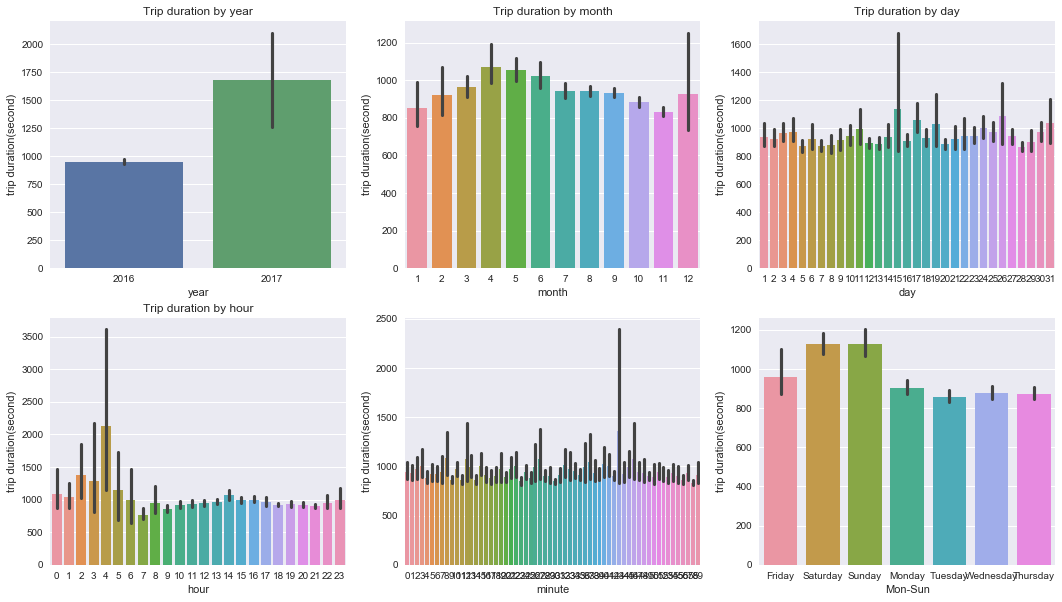

In [10]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=nybike, x = "year", y = "trip duration(second)", ax = ax1)
sns.barplot(data=nybike, x = "month", y = "trip duration(second)", ax = ax2)
sns.barplot(data=nybike, x = "day", y = "trip duration(second)", ax = ax3)
sns.barplot(data=nybike, x = "hour", y = "trip duration(second)", ax = ax4)
sns.barplot(data=nybike, x = "minute", y = "trip duration(second)", ax = ax5)
sns.barplot(data=nybike, x = "Mon-Sun", y = "trip duration(second)", ax = ax6)

ax1.set(ylabel = "trip duration(second)", title = "Trip duration by year")
ax2.set(ylabel = "trip duration(second)", title = "Trip duration by month")
ax3.set(ylabel = "trip duration(second)", title = "Trip duration by day")
ax4.set(ylabel = "trip duration(second)", title = "Trip duration by hour")

### Question 1 = When (specific time) do people mostly use bike-sharing service?

In [11]:
# Change names of value to be more meaningful with provided information
nybike.birth_year.replace({1960.0:'1960s',
                           1961.0:'1960s',
                           1962.0:'1960s',
                           1963.0:'1960s',
                           1964.0:'1960s',
                           1965.0:'1960s',
                           1966.0:'1960s',
                           1967.0:'1960s',
                           1968.0:'1960s',
                           1969.0:'1960s',
                           1970.0:'1970s',
                           1971.0:'1970s',
                           1972.0:'1970s',
                           1973.0:'1970s',
                           1974.0:'1970s',
                           1975.0:'1970s',
                           1976.0:'1970s',
                           1977.0:'1970s',
                           1978.0:'1970s',
                           1979.0:'1970s',
                           1980.0:'1980s',
                           1981.0:'1980s',
                           1982.0:'1980s',
                           1983.0:'1980s',
                           1984.0:'1980s',
                           1985.0:'1980s',
                           1986.0:'1980s',
                           1987.0:'1980s',
                           1988.0:'1980s',
                           1989.0:'1980s',
                           1990.0:'1990s',
                           1991.0:'1990s',
                           1992.0:'1990s',
                           1993.0:'1990s',
                           1994.0:'1990s',
                           1995.0:'1990s',
                           1996.0:'1990s',
                           1997.0:'1990s',
                           1998.0:'1990s',
                           1999.0:'1990s'},inplace=True)

In [12]:
nybike.groupby(by='birth_year')

[Text(0, 0.5, 'trip duration(second)'),
 Text(0.5, 1.0, 'Rental duration by birth year')]

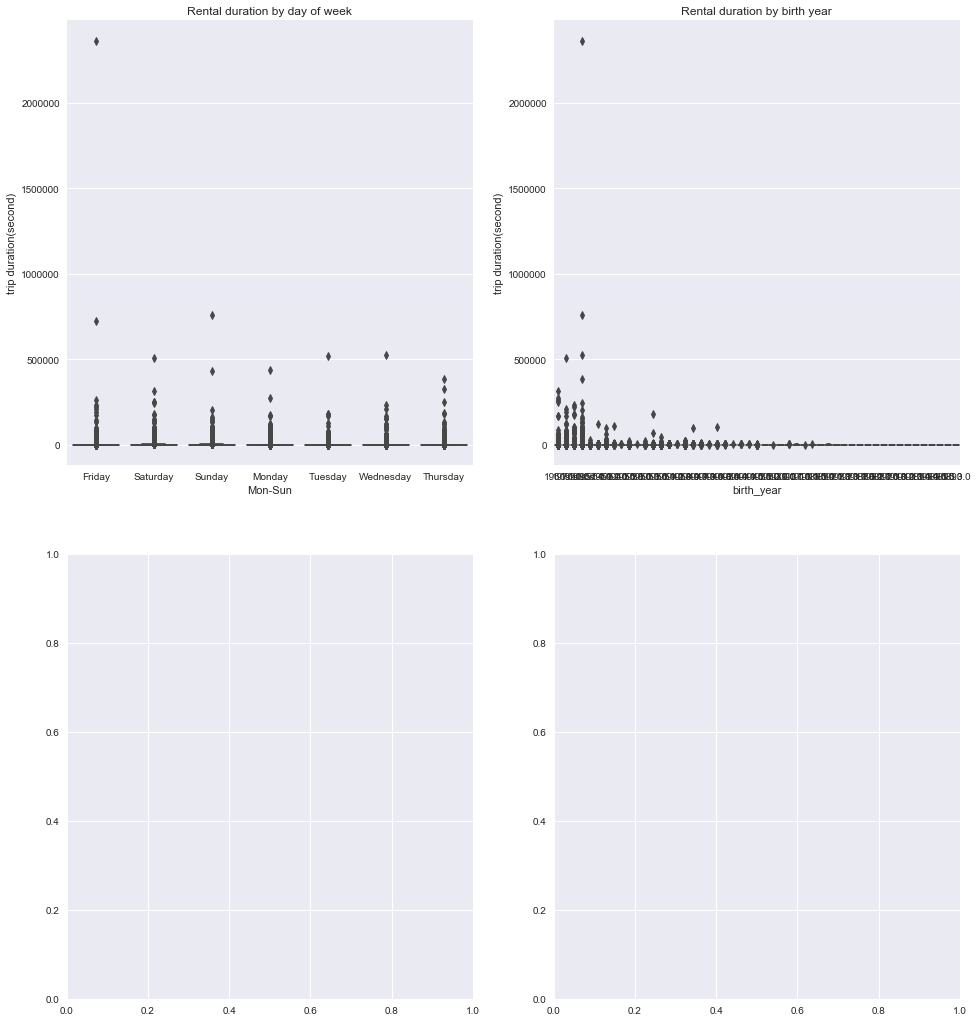

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 18))
sns.boxplot(data = nybike, y='trip duration(second)', x = 'Mon-Sun', orient = 'v', ax = axes[0][0])
sns.boxplot(data = nybike, y='trip duration(second)', x = 'birth_year', orient = 'v', ax = axes[0][1])

axes[0][0].set(ylabel = 'trip duration(second)', title = 'Rental duration by day of week')
axes[0][1].set(ylabel = 'trip duration(second)', title = 'Rental duration by birth year')

## References

- https://www.kaggle.com/samratp/bikeshare-analysis#Chicago-Divvy-2016.csv
- https://www.bbc.com/news/uk-48106617
- https://www.walkuplawoffice.com/2019/06/19/2019-electric-scooter-helmet-laws-in-california/
- https://www.washingtonpost.com/technology/2019/01/25/electric-scooters-send-more-people-hospital-than-bicycles-walking-new-study-finds/

### Question 2 = Which age range of is mostly using bike-sharing service?